In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd

# Pre-processing
Prepare dataset

In [2]:
!pwd

/home/jupyter/dl_related/NIC


In [3]:
data_path = Path('/home/jupyter/dl_related/NIC/NIC_dataset/room')
data_path.ls()

[PosixPath('/home/jupyter/dl_related/NIC/NIC_dataset/room/bathroom.txt'),
 PosixPath('/home/jupyter/dl_related/NIC/NIC_dataset/room/kitchen.txt'),
 PosixPath('/home/jupyter/dl_related/NIC/NIC_dataset/room/bedroom.txt'),
 PosixPath('/home/jupyter/dl_related/NIC/NIC_dataset/room/livingroom.txt'),
 PosixPath('/home/jupyter/dl_related/NIC/NIC_dataset/room/.ipynb_checkpoints')]

In [4]:
url_files = ['livingroom.txt','bedroom.txt','kitchen.txt','bathroom.txt']

In [5]:
for file in url_files:
    print(file.split('.')[0])
    break

livingroom


In [6]:
def create_dataset(files,max_image=3000):
#create dataset at path location
    for file in files:
        folder = file.split('.')[0]
        dest = Path('/home/jupyter/dl_related/NIC/data/rooms')/folder
        dest.mkdir(parents=True,exist_ok=True)
        download_images(data_path/file,dest,max_pics=max_image)

In [7]:
create_dataset(url_files)

In [8]:
for file in url_files:
        folder = file.split('.')[0]
        dest = Path('/home/jupyter/dl_related/NIC/data/rooms')/folder
        verify_images(dest,delete=True,max_size=3000)

# Start Training

In [2]:
path = Path('/home/jupyter/dl_related/NIC/data/rooms')
path.ls()

[PosixPath('/home/jupyter/dl_related/NIC/data/rooms/livingroom'),
 PosixPath('/home/jupyter/dl_related/NIC/data/rooms/bathroom'),
 PosixPath('/home/jupyter/dl_related/NIC/data/rooms/.ipynb_checkpoints'),
 PosixPath('/home/jupyter/dl_related/NIC/data/rooms/kitchen'),
 PosixPath('/home/jupyter/dl_related/NIC/data/rooms/bedroom')]

In [3]:
data = (ImageList
        .from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(),size=224)
        .databunch(bs=64,num_workers=4)
        .normalize(imagenet_stats)
       )

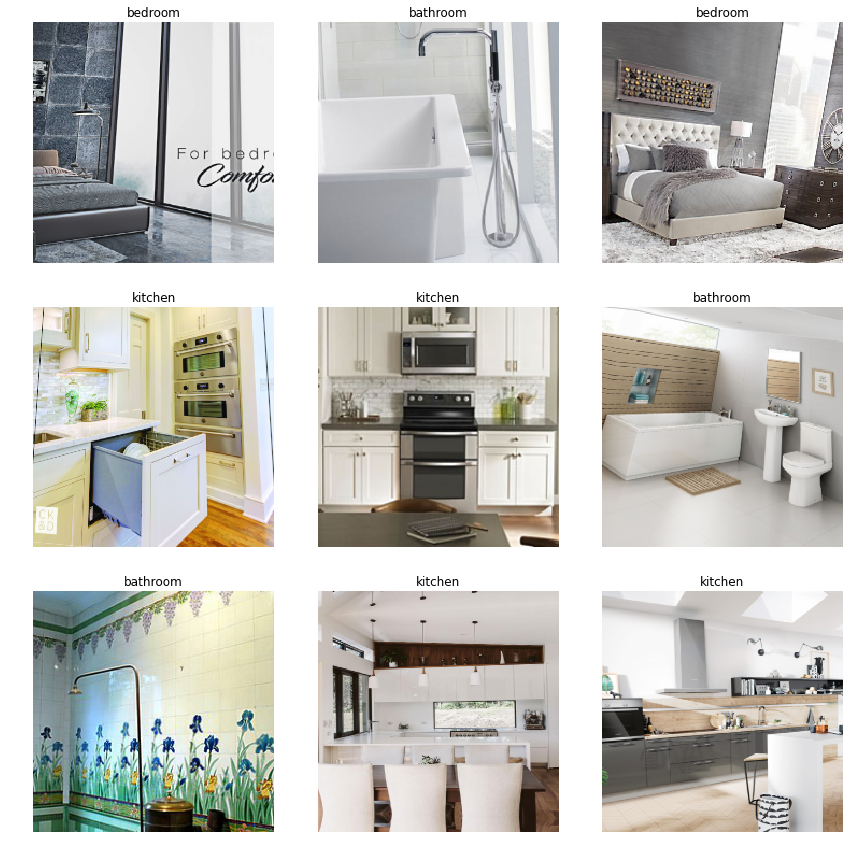

In [4]:
data.show_batch(rows=3)

In [5]:
learn = cnn_learner(data,models.resnet34,metrics=[accuracy])

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.63E-03
Min loss divided by 10: 1.00E-02


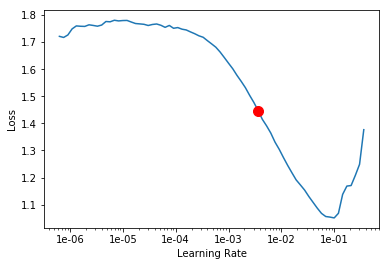

In [7]:
learn.recorder.plot(suggestion=True)

In [8]:
lr = 1e-2
learn.fit_one_cycle(6,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.987343,0.369260,0.849829,00:41
1,0.648427,0.387054,0.856655,00:34
2,0.498875,0.351169,0.870307,00:34
3,0.403911,0.277404,0.883959,00:36
4,0.340669,0.259496,0.901024,00:36
5,0.281067,0.256431,0.894198,00:34


In [9]:
learn.save('1a')

In [10]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 3.98E-05


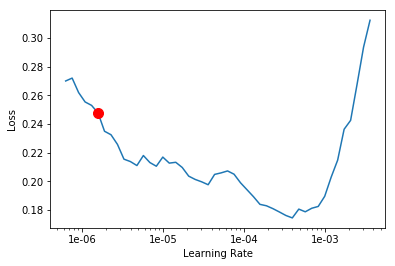

In [11]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [12]:
learn.fit_one_cycle(10,slice(3e-5,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.182809,0.217635,0.914676,00:35
1,0.142090,0.234246,0.918089,00:35
2,0.143804,0.279658,0.924915,00:35
3,0.124267,0.369984,0.911263,00:35
4,0.127593,0.382497,0.921502,00:36
5,0.104172,0.295195,0.931741,00:35
6,0.086200,0.218353,0.935154,00:35
7,0.068010,0.200251,0.931741,00:36
8,0.054840,0.201020,0.928328,00:35
9,0.044394,0.204900,0.924915,00:37


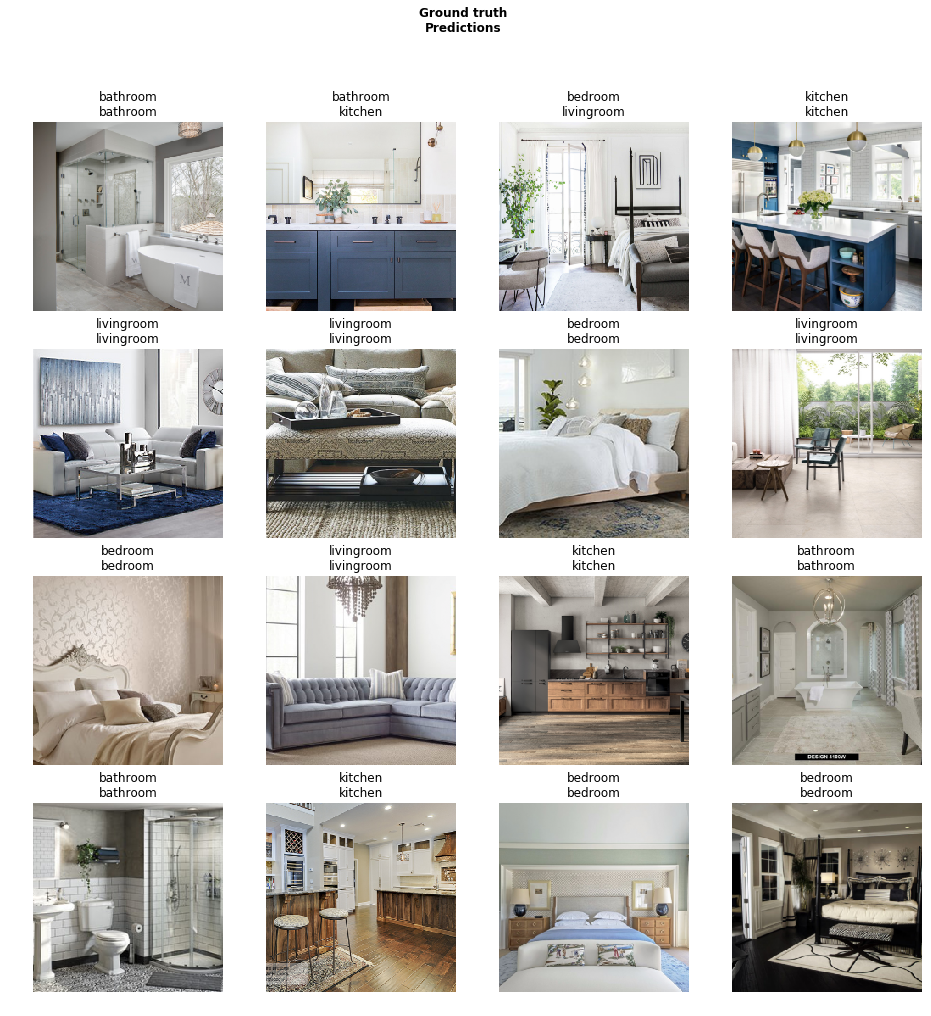

In [15]:
learn.show_results(rows=4)

# Fin
1174 images used for training set, 293 images for validation set.

Demo model with arch resnet 34